<a href="https://colab.research.google.com/github/risa1796/EDA-ML-exercises/blob/main/Lieferverzug_Prognose_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lierferverzug-Prognose

### ZEIT ist GELD 

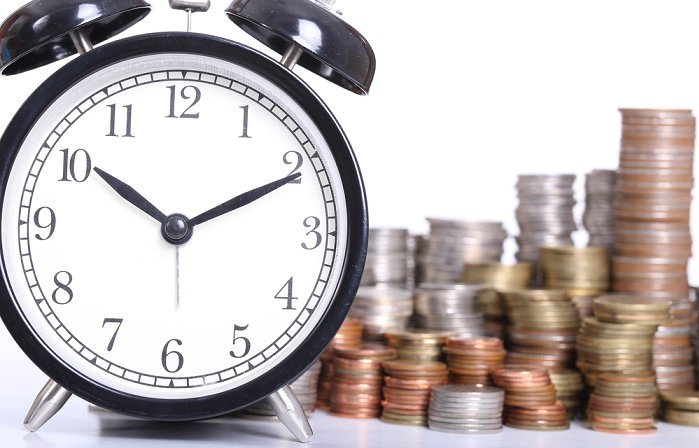

Meistens erwarten Kunden ein pünktliches Ankommen von ihren bestellten Produkten. Die meisten Unternehmen versprechen Produktlieferungen innerhalb dem genannten Zeitraum, leider aus verschiedenen Gründen könnten Lieferverzüge oft passieren und somit Liefertermine nicht eingehalten werden. Dies kann zur Unzufriedenheit von Kunden führen und vermehrte Lieferverzügen können auch den Unternehmensumsatz negativ stark beeinflussen. 

Produktlieferungen beeinflüssen interne und externe Ressourcen. Bei externen Ressourcen sind beispielsweise das Wetter oder Streiks bei Post oder DHL. Bezüglich zur internen Ressourcen kann sich die Produktionszeit stark von Produkten variieren. 

Im diesen Projekt werden wir Dataset aus Kaggle(https://www.kaggle.com/datasets/prachi13/customer-analytics?datasetId=1176727&sortBy=voteCount) verwenden, wobei externe Einflüsse sind in den Daten nicht vorhanden bzw. ausgeschlossen. Allerdings gibt es natürlich die Möglichkeit, sie mit Hilfe von API zu ziehen und in der Prognose mit berücksichtigen.   

Hier geht es um ein binäres Klassifikationsproblem.
Daten stammt von einem E-Commerce Unternehmen, das elektronische Geräte verkauft. 

In [1]:
%cd /content/drive/MyDrive/딥러닝기초

/content/drive/MyDrive/딥러닝기초


In [2]:
import pandas as pd 


df = pd.read_csv('./Lieferverzug.csv')

In [3]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


Es gibt keine fehlende Werte.

In [5]:
df.drop('ID',axis=1,inplace=True)

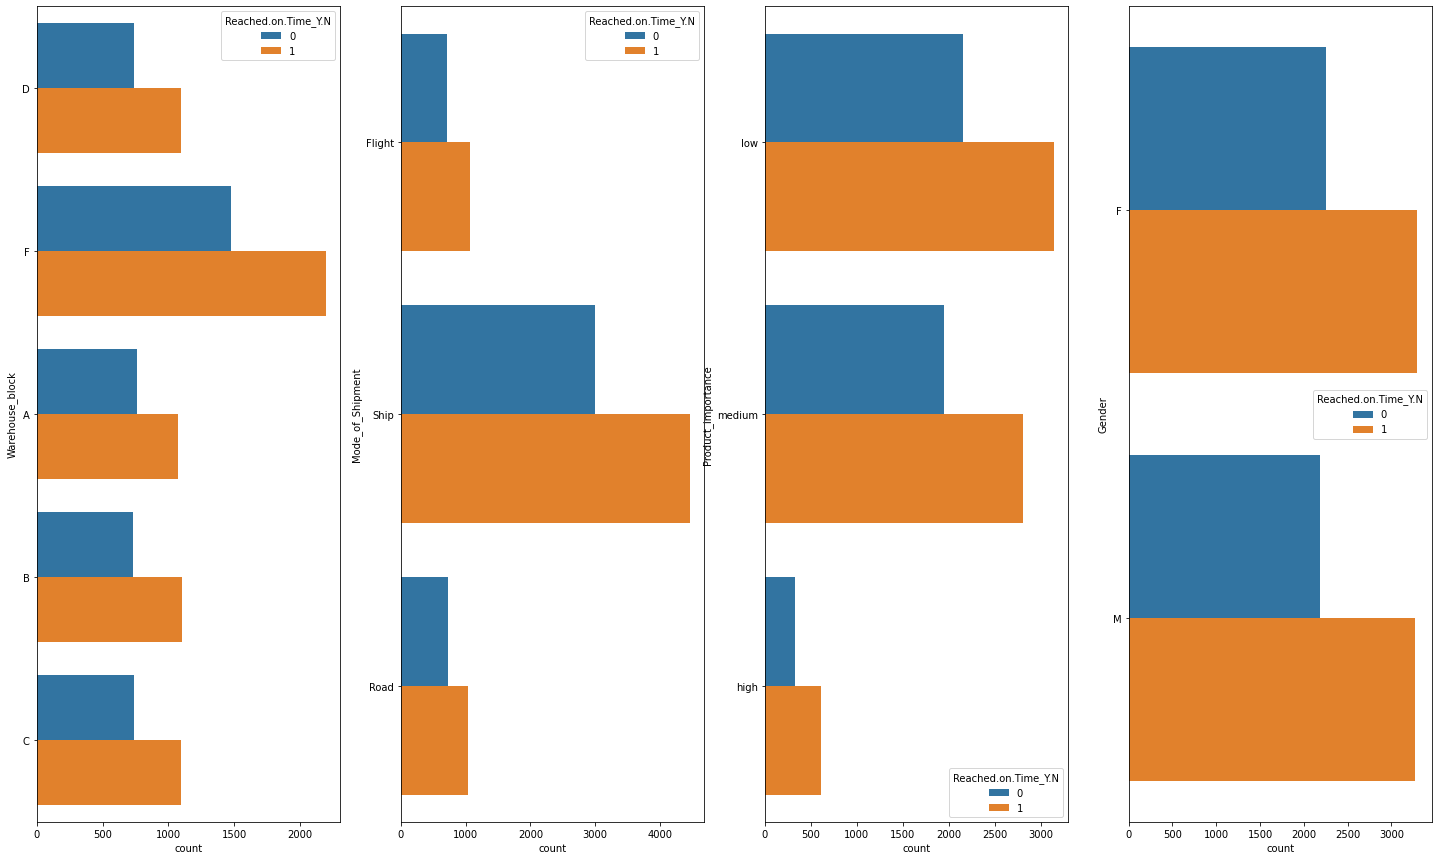

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

plt.rcParams["figure.figsize"] = (25,15)


obj_features = list(df.select_dtypes(['object']).columns)

fig, axes = plt.subplots(1, 4)

for i, col in enumerate(obj_features):
  sns.countplot(data=df, y=col, hue = "Reached.on.Time_Y.N", ax=axes[i])
  # Show the plot

plt.show()

In [7]:
df['Reached.on.Time_Y.N'].value_counts()

1    6563
0    4436
Name: Reached.on.Time_Y.N, dtype: int64

Paar Informationen:
- Die meiste Bestellungen werden aus Warehouse F geliefert.
- Die meiste Bestellungen werden mit dem Schiff geliefert.
- Produkte mit Importance von low & medium sind am meisten.
- Das Geschlecht von Käufern spielt wenige Rolle.

**Generell sind bisschen mehr pünktliche Lieferungen als nicht-pünktliche. Es ist schwierig, dieses Problem voll und ganz zu beheben. Aber das Risiko könnte trotzdem vermindert werden, indem man ein Prognose-Modell entwickelt, das möglichst präzise Vorhersage macht, welches Produkt in welcher Menge mit welcher Versandart höhstens zu einem Lieferverzug kommen könnte.**

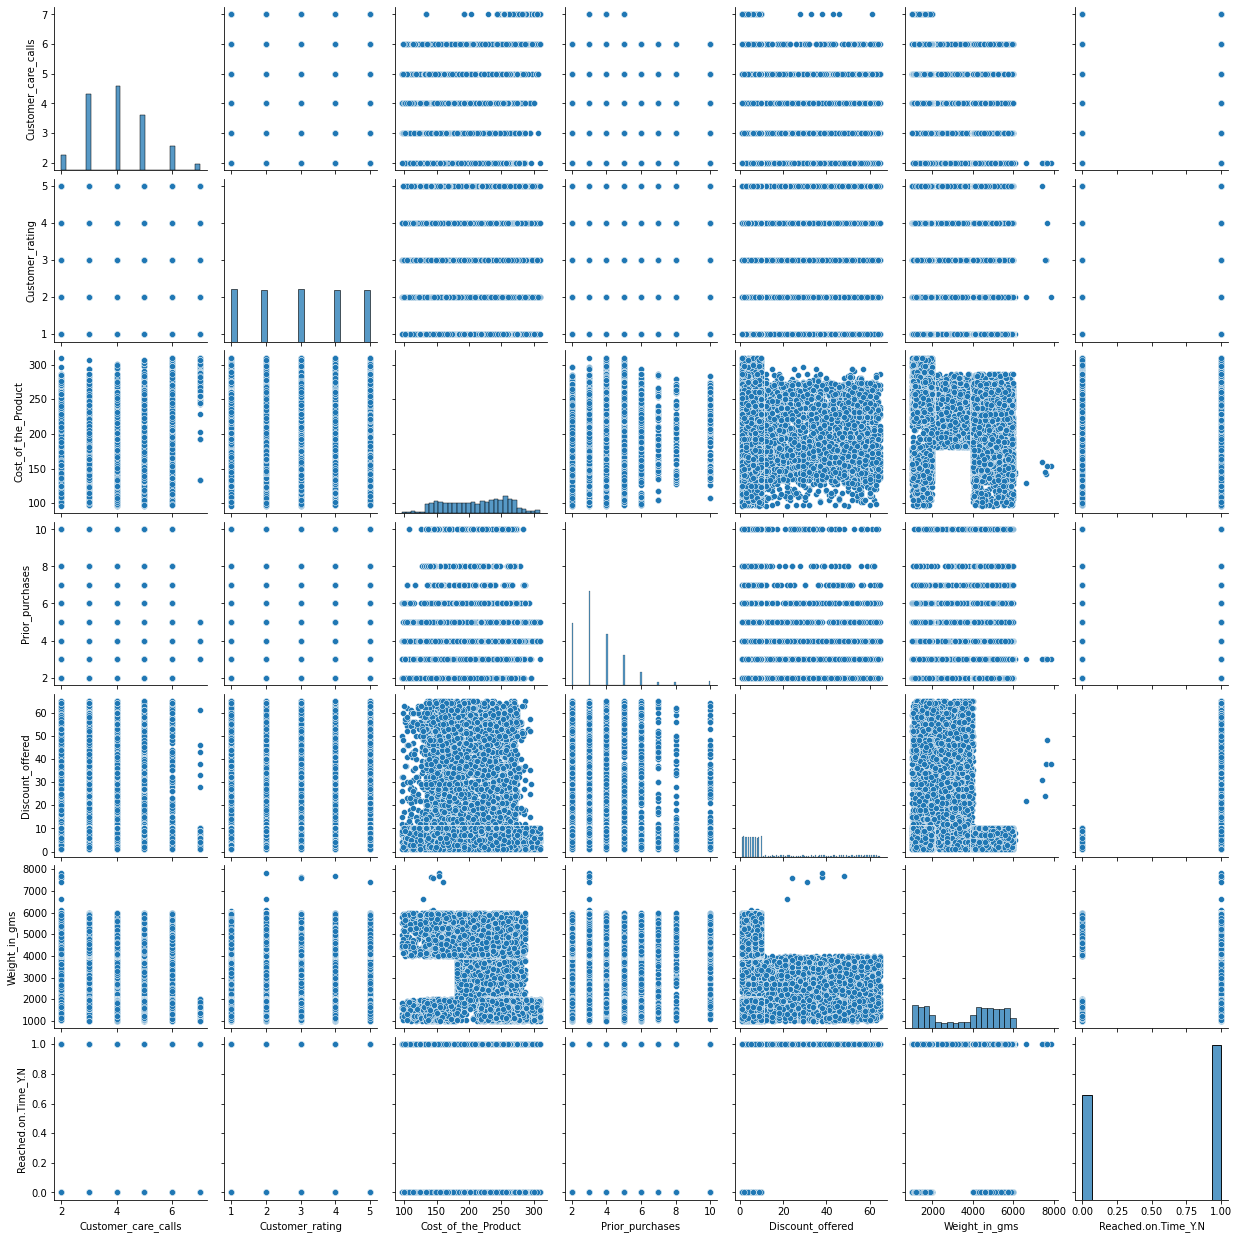

In [8]:
sns.pairplot(df)

In [9]:
df.describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


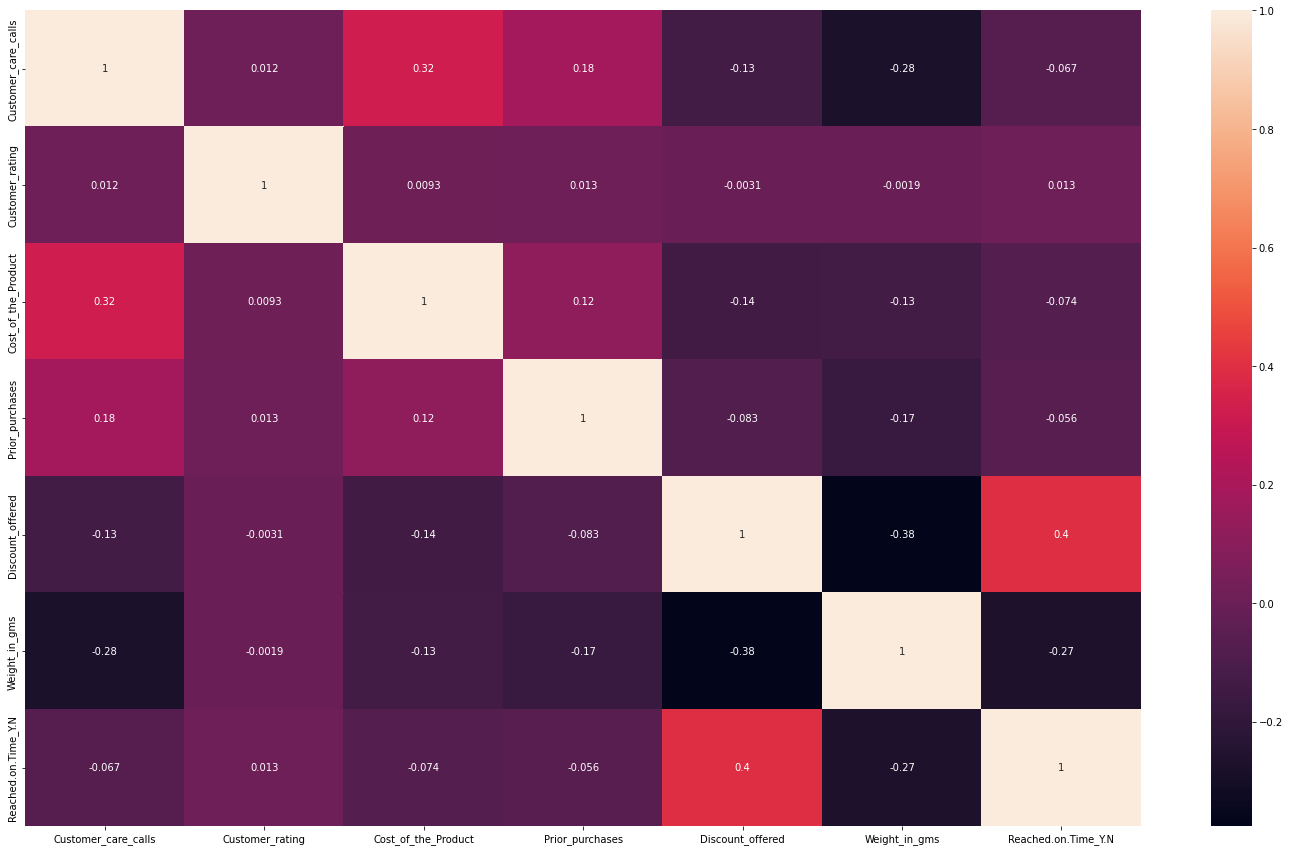

In [10]:
sns.heatmap(df.corr(),annot=True)

Informationen:
- Je teuer das Produkt, desto mehr achtet der Kunde auf die Bestellung bzw. tätigt mehr Anrufe beim Kundenservice.
- Kunde mit Prior-Bestellungen bestellen leicht tendenziell teure Produkte und erkundigen sich über die Lieferungen beim Kundenservice. 
- Produkte, die mit höheren Rabatten bestellt worden sind, werden pünktlicher geliefert. 

In [ ]:
!pip install pycaret

In [ ]:
!pip install numba==0.53

In [16]:
from pycaret.classification import *

In [21]:
import logging
logging.disable(logging.CRITICAL)

In [22]:
clf1 = setup(data = df, 
             target = 'Reached.on.Time_Y.N',
             silent = True)

,Description,Value
0,session_id,431
1,Target,Reached.on.Time_Y.N
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(10999, 11)"
5,Missing Values,False
6,Numeric Features,3
7,Categorical Features,7
8,Ordinal Features,False
9,High Cardinality Features,False


In [23]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.6697,0.7316,0.5742,0.8269,0.6776,0.3608,0.3865,0.879
ada,Ada Boost Classifier,0.6657,0.7406,0.6165,0.7845,0.6903,0.3382,0.3501,0.331
lightgbm,Light Gradient Boosting Machine,0.6598,0.7352,0.6301,0.7661,0.6913,0.3203,0.3281,0.189
rf,Random Forest Classifier,0.6532,0.7374,0.6589,0.7396,0.6967,0.2949,0.2978,0.817
knn,K Neighbors Classifier,0.6531,0.7288,0.6892,0.7241,0.7060,0.2834,0.2841,0.097
dt,Decision Tree Classifier,0.6496,0.6335,0.7102,0.7103,0.7101,0.2670,0.2672,0.057
nb,Naive Bayes,0.6472,0.7140,0.4857,0.8755,0.6246,0.3400,0.3935,0.023
lda,Linear Discriminant Analysis,0.6436,0.7301,0.7259,0.6974,0.7112,0.2462,0.2467,0.054
ridge,Ridge Classifier,0.6432,0.0000,0.7321,0.6946,0.7127,0.2427,0.2435,0.020
et,Extra Trees Classifier,0.6403,0.7175,0.6988,0.7043,0.7014,0.2492,0.2494,0.868


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=431, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [33]:
nb = create_model('nb')    

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6429,0.7176,0.4893,0.8604,0.6238,0.3297,0.3782
1,0.6455,0.7081,0.4914,0.8642,0.6265,0.3345,0.3838
2,0.6338,0.7177,0.4657,0.8680,0.6061,0.3179,0.3728
3,0.6597,0.7458,0.4828,0.9146,0.6320,0.3675,0.4337
4,0.6442,0.6914,0.4850,0.8692,0.6226,0.3338,0.3857
5,0.6636,0.7307,0.5118,0.8815,0.6476,0.3666,0.4171
6,0.6325,0.7080,0.4516,0.8824,0.5974,0.3190,0.3808
7,0.6299,0.6882,0.4667,0.8543,0.6036,0.3086,0.3593
8,0.6481,0.7117,0.4903,0.8702,0.6272,0.3399,0.3911


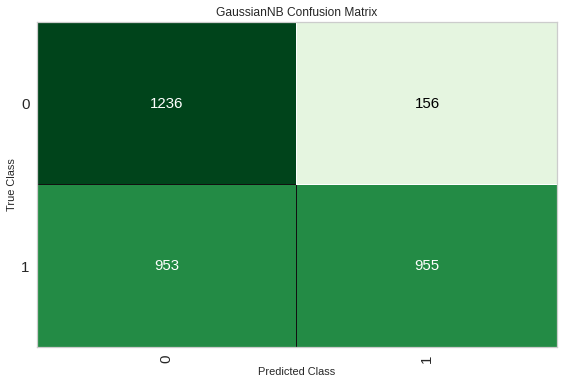

In [34]:
plot_model(estimator = nb, plot = 'confusion_matrix')

In [35]:
1-(156/(1236+156))

0.8879310344827587

Naiv Bayes Modell kann Produkte mit Lieferverzug ganz gut klassifizieren, aber im Gegenteil nicht. Da aber lediglich Bestellungen mit Lieferverzug uns interessieren, finde ich das Modell nicht so schlecht. 

> Mit rund **89% Genauigkeit** kann das Modell nämlich Bestellungen mit Lieferverzug aussortieren. Dieser Genauigkeitsgrad aus circa 10,000 Datensätzen zu erzielen ist meiner Ansicht nach absolut in Ordnung. Es gibt natürlich Luft nach oben; mehr Datensätze können zum besseren Grad bringen.

In [37]:
import pickle
import joblib

# 객체 
filename = 'lieferverzug_model.pkl'
joblib.dump(nb,filename)

['lieferverzug_model.pkl']

In [38]:
mdl = joblib.load('lieferverzug_model.pkl')
mdl

GaussianNB(priors=None, var_smoothing=1e-09)

In [41]:
cols = df.columns[:-1]

In [54]:
cols= list()
for i in clf1:
  if isinstance(i, pd.DataFrame):
    print(i.columns)
    cols = i.columns
    break
  else: 
    pass

Index(['Cost_of_the_Product', 'Discount_offered', 'Weight_in_gms',
       'Warehouse_block_A', 'Warehouse_block_B', 'Warehouse_block_C',
       'Warehouse_block_D', 'Warehouse_block_F', 'Mode_of_Shipment_Flight',
       'Mode_of_Shipment_Road', 'Mode_of_Shipment_Ship',
       'Customer_care_calls_2', 'Customer_care_calls_3',
       'Customer_care_calls_4', 'Customer_care_calls_5',
       'Customer_care_calls_6', 'Customer_care_calls_7', 'Customer_rating_1',
       'Customer_rating_2', 'Customer_rating_3', 'Customer_rating_4',
       'Customer_rating_5', 'Prior_purchases_10', 'Prior_purchases_2',
       'Prior_purchases_3', 'Prior_purchases_4', 'Prior_purchases_5',
       'Prior_purchases_6', 'Prior_purchases_7', 'Prior_purchases_8',
       'Product_importance_high', 'Product_importance_low',
       'Product_importance_medium', 'Gender_F'],
      dtype='object')


In [ ]:
def program():
  cost= int(input('Was ist der Bestellpreis?'))
  discount=int(input('Wie hoch war der Rabatt?'))
  weight=int(input('Wie schwer ist die Bestellung?'))
  warehouse = input('Aus welchem Lagerhaus?')
  shipart =input('Was ist der Versandart?')
  calls = input('Wie viel Calls?')
  rating = input('Wie ist die Kundebewertung?')
  prior = input('Wie viel Prior Bestellungen?')
  importance = input('wie wichtig ist die Bestellung?')
  gender_f = int(input('Frau oder Mann?'))

  data = []

  data.append(cost)
  data.append(discount)
  data.append(weight)
  if warehouse == 'A':
    data.append(1,0,0,0,0)
  elif warehouse = 'B':
    data.append(0,1,0,0,0)
  elif warehouse = 'C':
    data.append(0,0,1,0,0)
  elif warehouse = 'D':
    data.append(0,0,0,1,0)
  elif warehouse = 'F':
    data.append(0,0,0,0,1)

  if shipart == 'Flight':
    data.append(1,0,0)
  elif shipart == 'Road':
    data.append(0,1,0)
  elif shipart == 'Ship':
    data.append(0,0,1)

  if calls = '2':
    data.append(1,0,0,0,0,0)
  elif calls = '3':
    data.append(0,1,0,0,0,0)
  elif calls = '4':
    data.append(0,0,1,0,0,0) 
  elif calls = '5':
    data.append(0,0,0,1,0,0) 
  elif calls = '6':
    data.append(0,0,0,0,1,0) 
  elif calls = '7':
    data.append(0,0,0,0,0,1) 

In [79]:
data = [250, 50, 150,
       0, 1, 0,
       0, 0, 1,
       0, 0,
       1, 0,
       0, 0,
       0, 0, 1,
       0, 0, 0,
       0, 1, 0,
       0,0, 0,
       0,0, 0,
       0, 1,
       0, 1]

In [80]:
df = pd.DataFrame(data).transpose()
df.columns = cols
df

,Cost_of_the_Product,Discount_offered,Weight_in_gms,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,...,Prior_purchases_3,Prior_purchases_4,Prior_purchases_5,Prior_purchases_6,Prior_purchases_7,Prior_purchases_8,Product_importance_high,Product_importance_low,Product_importance_medium,Gender_F
0,150,50,150,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1


In [81]:
y_pred = mdl.predict(df)
y_pred

array([1])